In [181]:
import pickle
import matplotlib.pyplot as plt
from astropy.io import fits
from fittingtask import FittingTask
import os
import numpy as np
import glob
homedir = os.path.expanduser('~')
from matplotlib.lines import Line2D
c = 2.99792e5 # km/s

#### Callie Models

In [44]:
# load pickle results
with open("result_fit_all_callie.pickle", "rb") as f:
    rescallie = pickle.load(f)

In [194]:
# get chisqs
chisq = []
for key in sorted(rescallie.keys()):
    chisq.append([rescallie[key]['fit'][j][1] for j in range(4)])
chisq = np.array(chisq)
weights = np.zeros(chisq.shape)
for order in range(4):
    weights[:,order] = np.min(chisq[:,order])/chisq[:,order]
weights


array([[0.1938184 , 0.09074285, 0.12809829, 0.26017168],
       [0.3492236 , 0.11234038, 0.19065779, 0.26599094],
       [0.54700881, 0.19109118, 0.28024798, 0.40920258],
       [0.7471068 , 0.28387889, 0.39364951, 0.64026327],
       [0.12632615, 0.20963886, 0.17505336, 0.21773444],
       [0.08454577, 0.11135818, 0.1008162 , 0.16819011],
       [0.18116606, 0.10436925, 0.13849497, 0.28004775],
       [0.23508831, 0.11987327, 0.17168725, 0.35656224],
       [0.36870303, 0.16297186, 0.21016119, 0.34254967],
       [0.6986998 , 0.1594564 , 0.25938404, 0.53322797],
       [1.        , 1.        , 1.        , 1.        ],
       [0.16882241, 0.20541267, 0.23863034, 0.25901052]])

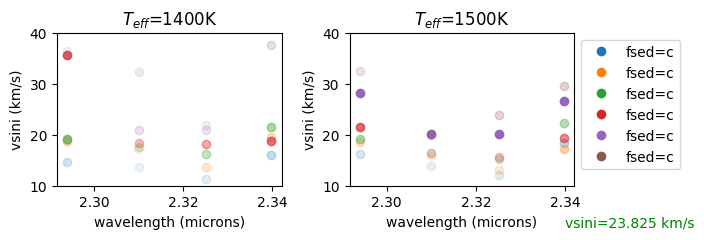

In [197]:
# vsini plot
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',
        'tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']
plt.figure(figsize=(7,2.5))
num_models = len(rescallie.keys())
for j, model in enumerate(sorted(rescallie.keys())):
    for i, teff in enumerate(["1400", "1500"]):
        if teff in model:
            vsini = []
            wl = []
            plt.subplot(1,2,i+1)
            for order in range(4):
                fit = rescallie[model]["fit"][order]
                wl.append(np.median(rescallie[model]["lam"][order]))
                vsini.append(fit[0][0])
                plt.plot(wl[order], vsini[order], "o", alpha=weights[j, order], color=colors[j], label=f"fsed={model[11:12]}")
            plt.xlabel("wavelength (microns)")
            plt.ylabel("vsini (km/s)")
            plt.title("$T_{eff}$="+teff+"K")
            if i==1:
                legend_elements = [Line2D([0], [0], marker='o', markersize=8, color='w', label=f"fsed={model[11:12]}",
                        markerfacecolor=colors[j]) for j in range(6)]
                plt.legend(handles=legend_elements, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.ylim(10,40)

# compute weighted average
model_ind = 10
bestmodel = sorted(rescallie.keys())[model_ind]
w = weights[model_ind]/np.sum(weights[model_ind])
bestvsini = [rescallie[bestmodel]["fit"][order][0][0] for order in range(4)]
avg_vsini = np.sum([w[order] * bestvsini[order] for order in range(4)])
plt.text(2.34, 2, f"vsini={avg_vsini:.3f} km/s", color="g")
plt.show()

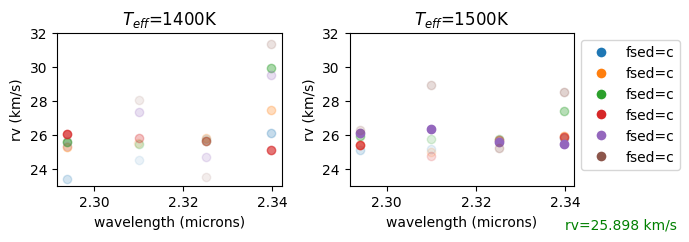

In [198]:
# rv plot
plt.figure(figsize=(7,2.5))
num_models = len(rescallie.keys())
for j, model in enumerate(sorted(rescallie.keys())):
    for i, teff in enumerate(["1400", "1500"]):
        if teff in model:
            rv = []
            wl = []
            plt.subplot(1,2,i+1)
            for order in range(4):
                fit = rescallie[model]["fit"][order]
                wl.append(np.median(rescallie[model]["lam"][order]))
                rv.append(fit[0][2] * c)
                plt.plot(wl[order], rv[order], "o", alpha=weights[j, order], color=colors[j], label=f"fsed={model[11:12]}")
            plt.xlabel("wavelength (microns)")
            plt.ylabel("rv (km/s)")
            plt.title("$T_{eff}$="+teff+"K")
            if i==1:
                legend_elements = [Line2D([0], [0], marker='o', markersize=8, color='w', label=f"fsed={model[11:12]}",
                        markerfacecolor=colors[j]) for j in range(6)]
                plt.legend(handles=legend_elements, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.ylim(23,32)

# compute weighted average
model_ind = 10
bestmodel = sorted(rescallie.keys())[model_ind]
w = weights[model_ind]/np.sum(weights[model_ind])
bestrv = [rescallie[bestmodel]["fit"][order][0][2] *c  for order in range(4)]
avg_rv = np.sum([w[order] * bestrv[order] for order in range(4)])
plt.text(2.34, 20.5, f"rv={avg_rv:.3f} km/s", color="g")
plt.show()

#### BTSettl Models

In [43]:
# load pickle results
with open("result_fit_all_models.pickle", "rb") as f:
    resall = pickle.load(f)

In [199]:
# get chisqs
chisq = []
for key in sorted(resall.keys()):
    chisq.append([resall[key]['fit'][j][1] for j in range(4)])
chisq = np.array(chisq)
weights = np.zeros(chisq.shape)
for order in range(4):
    weights[:,order] = np.min(chisq[:,order])/chisq[:,order]
weights

array([[0.04898481, 0.08254186, 0.06164658, 0.18075306],
       [0.05275576, 0.07862133, 0.04774409, 0.11965797],
       [0.06307358, 0.07260753, 0.05121558, 0.12437085],
       [0.10286924, 0.10328439, 0.09758179, 0.15613237],
       [0.14086633, 0.11750948, 0.12596741, 0.14502186],
       [0.08894078, 0.12645681, 0.12469322, 0.10698104],
       [0.06166251, 0.07471725, 0.06424441, 0.06578227],
       [0.10627218, 0.14753675, 0.08505945, 0.29841632],
       [0.05491239, 0.12883967, 0.07975986, 0.22948703],
       [0.04799605, 0.10234486, 0.07204615, 0.17909709],
       [0.06391949, 0.10153249, 0.07907513, 0.10948184],
       [0.10697071, 0.09616223, 0.09807024, 0.13599472],
       [0.12067819, 0.09645804, 0.08748402, 0.10999649],
       [0.10824521, 0.2464887 , 0.16681162, 0.11710788],
       [0.05724711, 0.1605671 , 0.07817098, 0.25087364],
       [0.07059834, 0.12692889, 0.09282362, 0.26715554],
       [0.10729398, 0.20609189, 0.14452014, 0.30802035],
       [0.12369033, 0.14879728,

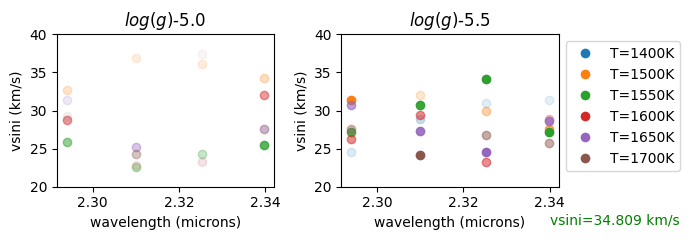

In [251]:
# vsini plot
colors = ['tab:blue','tab:blue','tab:orange','tab:orange','tab:green','tab:green',
'tab:red','tab:red', 'tab:purple','tab:purple','tab:brown','tab:brown']
plt.figure(figsize=(7,2.5))
num_models = len(resall.keys())
it = 0
for j, model in enumerate(sorted(resall.keys())):
    for i, g in enumerate(["-5.0", "-5.5"]):
        if g in model:
            T = float(model[4:8]) * 100
            if (T < 1701) and (T > 1399):
                vsini = []
                wl = []
                plt.subplot(1,2,i+1)
                for order in range(4):
                    fit = resall[model]["fit"][order]
                    wl.append(np.median(resall[model]["lam"][order]))
                    vsini.append(fit[0][0])
                    #print(order, j, it, T)
                    plt.plot(wl[order], vsini[order], "o", alpha=weights[j, order]**2, color=colors[it], label=f"T={T:.0f}K")
                plt.xlabel("wavelength (microns)")
                plt.ylabel("vsini (km/s)")
                plt.title("$log(g)$"+g)
                plt.ylim(20,40)
                it += 1
Teff = [1400, 1500, 1550, 1600, 1650, 1700]
legend_elements = [Line2D([0], [0], marker='o', markersize=8, color='w', label=f"T={Teff[j]:.0f}K",
                        markerfacecolor=colors[j*2]) for j in range(6)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1, 1))
plt.tight_layout()

# compute weighted average
model_ind = 25
bestmodel = sorted(resall.keys())[model_ind]
w = weights[model_ind]/np.sum(weights[model_ind])
bestvsini = [resall[bestmodel]["fit"][order][0][0] for order in range(4)]
avg_vsini = np.sum([w[order] * bestvsini[order] for order in range(4)])
plt.text(2.34, 15, f"vsini={avg_vsini:.3f} km/s", color="g")
plt.show()

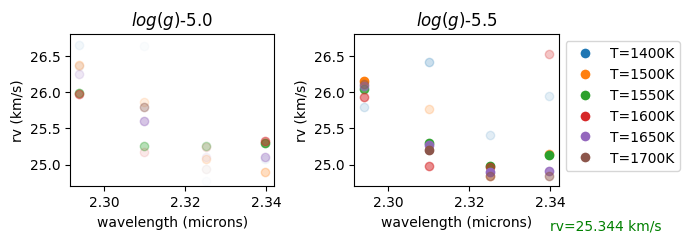

In [249]:
# rv plot
colors = ['tab:blue','tab:blue','tab:orange','tab:orange','tab:green','tab:green',
'tab:red','tab:red', 'tab:purple','tab:purple','tab:brown','tab:brown']
plt.figure(figsize=(7,2.5))
num_models = len(resall.keys())
it = 0
for j, model in enumerate(sorted(resall.keys())):
    for i, g in enumerate(["-5.0", "-5.5"]):
        if g in model:
            T = float(model[4:8]) * 100
            if (T < 1701) and (T > 1399):
                rv = []
                wl = []
                plt.subplot(1,2,i+1)
                for order in range(4):
                    fit = resall[model]["fit"][order]
                    wl.append(np.median(resall[model]["lam"][order]))
                    rv.append(fit[0][2] * c)
                    #print(order, j, it, T)
                    plt.plot(wl[order], rv[order], "o", alpha=weights[j, order]**2, color=colors[it], label=f"T={T:.0f}K")
                plt.xlabel("wavelength (microns)")
                plt.ylabel("rv (km/s)")
                plt.title("$log(g)$"+g)
                plt.ylim(24.7,26.8)
                it += 1
Teff = [1400, 1500, 1550, 1600, 1650, 1700]
legend_elements = [Line2D([0], [0], marker='o', markersize=8, color='w', label=f"T={Teff[j]:.0f}K",
                        markerfacecolor=colors[j*2]) for j in range(6)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1, 1))
plt.tight_layout()

# compute weighted average
model_ind = 28
bestmodel = sorted(resall.keys())[model_ind]
w = weights[model_ind]/np.sum(weights[model_ind])
bestrv = [resall[bestmodel]["fit"][order][0][2] * c for order in range(4)]
avg_rv = np.sum([w[order] * bestrv[order] for order in range(4)])
plt.text(2.34, 24.1, f"rv={avg_rv:.3f} km/s", color="g")
plt.show()

In [264]:
bestlist = [28, 37, 44, 26, 25]

for model_ind in bestlist:
    model = sorted(resall.keys())[model_ind]
    w = weights[model_ind]/np.sum(weights[model_ind])
    bestvsini = [resall[model]["fit"][order][0][0] for order in range(4)]
    avg_vsini = np.sum([w[order] * bestvsini[order] for order in range(4)])
    bestrv = [resall[model]["fit"][order][0][2] * c for order in range(4)]
    avg_rv = np.sum([w[order] * bestrv[order] for order in range(4)])
    print(model.split("-0.0a")[0], f"vsini = {avg_vsini:.2f} km/s, rv = {avg_rv:.2f} km/s")

lte015.5-5.5 vsini = 29.90 km/s, rv = 25.34 km/s
lte016.5-5.5 vsini = 27.62 km/s, rv = 25.26 km/s
lte017.0-5.5 vsini = 25.84 km/s, rv = 25.23 km/s
lte015.0-5.5 vsini = 30.11 km/s, rv = 25.54 km/s
lte015.0-5.0 vsini = 34.81 km/s, rv = 25.54 km/s
